## Discussion Related With Outliers And Impact On Machine Learning!!

##### What is an outlier ?
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population

##### Which Machine LEarning Models Are Sensitive To Outliers?

1. Naivye Bayes Classifier-------------------Not Sensitive To Outliers
2. SVM --------------------------------------Not Sensitive To Outliers          
3. Linear Regression-------------------------Sensitive To Outliers
4. Logistic Regression-----------------------Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)-------------------Not Sensitive
7. KNN---------------------------------------Not Sensitive 
8. Kmeans------------------------------------Sensitive
9. Hierarichal-------------------------------Sensitive 
10. PCA--------------------------------------Sensitive 
11. Neural Networks--------------------------Sensitive
12. DBScan-----------------------------------Sensitive

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

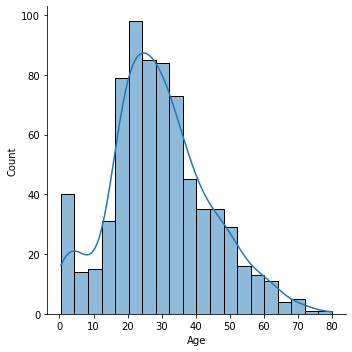

In [4]:
sns.displot(df['Age'].dropna(),kde=True)
plt.show()

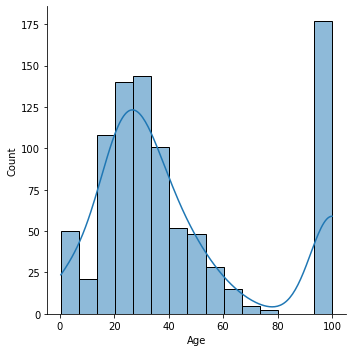

In [5]:
sns.displot(df['Age'].fillna(100),kde=True)
plt.show()

#### Gaussian Distributed

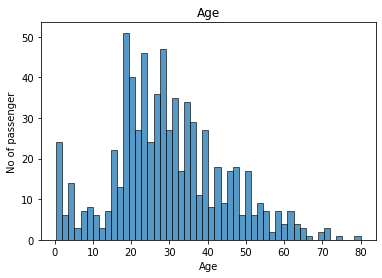

In [6]:
sns.histplot(df['Age'], bins=50)

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('No of passenger')

plt.show()

<AxesSubplot:xlabel='Age'>

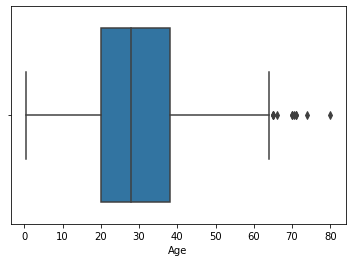

In [7]:
sns.boxplot(x=df["Age"])

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df_copy = df.copy()

# If The Data Is Normally Distributed or close to

In [10]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary)
print(uppper_boundary)
print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


In [11]:
filt_left = df_copy['Age'] <= lower_boundary
filt_right = df_copy['Age'] >= uppper_boundary

df_copy.loc[filt_left ,'Age'] = lower_boundary
df_copy.loc[filt_right ,'Age'] = uppper_boundary

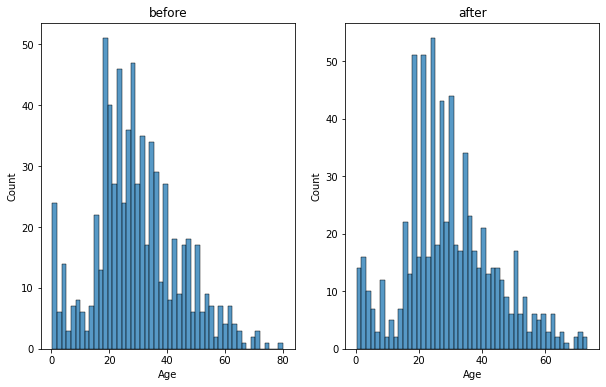

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=50)
plt.title('before')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['Age'], bins=50)
plt.title('after')

plt.show()

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


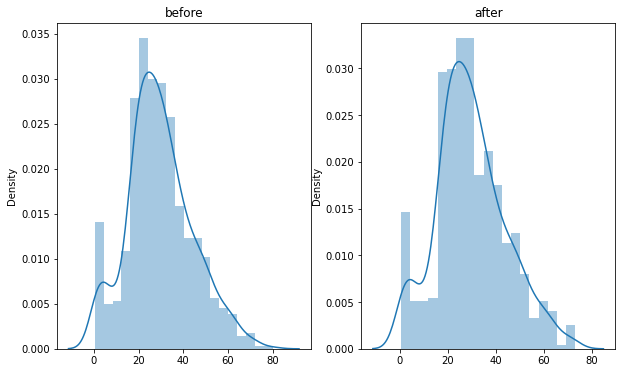

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.distplot(x=df['Age'], kde=True)
plt.title('before')

plt.subplot(1, 2, 2)
sns.distplot(x=df_copy['Age'], kde=True)
plt.title('after')

plt.show()

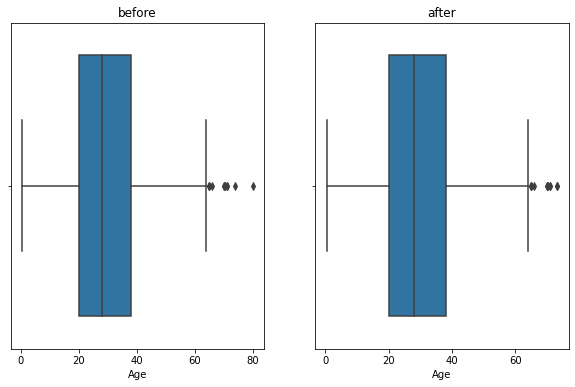

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('before')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_copy['Age'])
plt.title('after')

plt.show()

In [15]:
compare = pd.DataFrame()
compare

""


In [16]:
compare = pd.DataFrame()
compare['index'] = df['Age'].describe().index

compare['before'] = df['Age'].describe().values
compare['after'] = df_copy['Age'].describe().values

compare

,index,before,after
0,count,714.000000,714.000000
1,mean,29.699118,29.688694
2,std,14.526497,14.492933
3,min,0.420000,0.420000
4,25%,20.125000,20.125000
5,50%,28.000000,28.000000
6,75%,38.000000,38.000000
7,max,80.000000,73.278610


# If data is Skewed (not normal)

Text(0, 0.5, 'No of passenger')

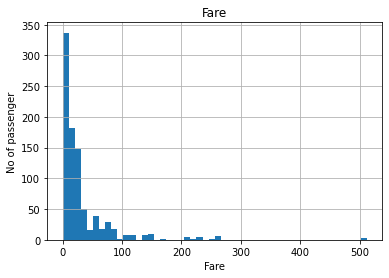

In [17]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

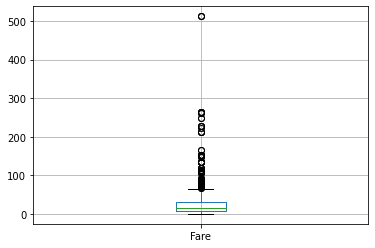

In [18]:
df.boxplot(column="Fare")

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [21]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)

print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [22]:
#### Extreme outliers
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

here if we use strict boundary meaning 1.5 then for our data it will not cover all. First try loose one if still a lot of outliers are still present then be tight.

In [23]:
filt_left = df_copy['Fare'] <= lower_bridge
filt_right = df_copy['Fare'] >= upper_bridge

df_copy.loc[filt_left ,'Fare'] = lower_bridge
df_copy.loc[filt_right ,'Fare'] = upper_bridge

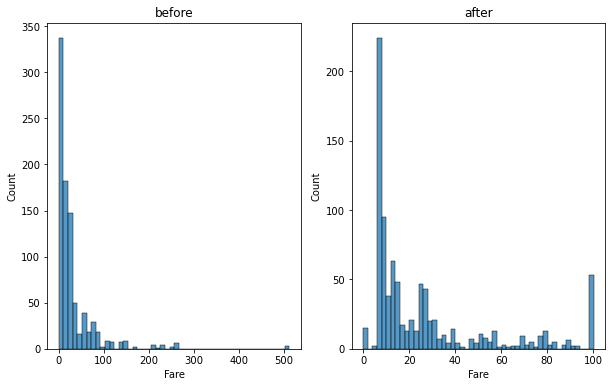

In [24]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], bins=50)
plt.title('before')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['Fare'], bins=50)
plt.title('after')

plt.show()

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


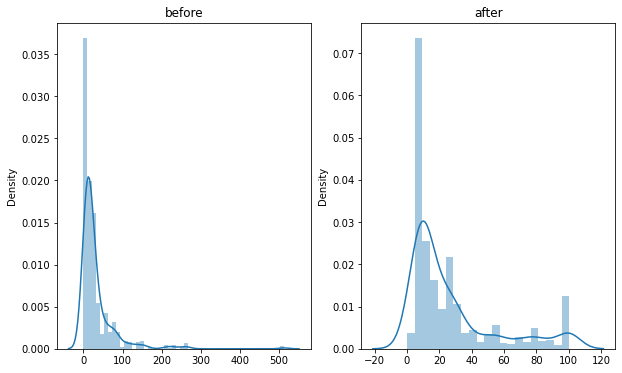

In [25]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.distplot(x=df['Fare'], kde=True)
plt.title('before')

plt.subplot(1, 2, 2)
sns.distplot(x=df_copy['Fare'], kde=True)
plt.title('after')

plt.show()

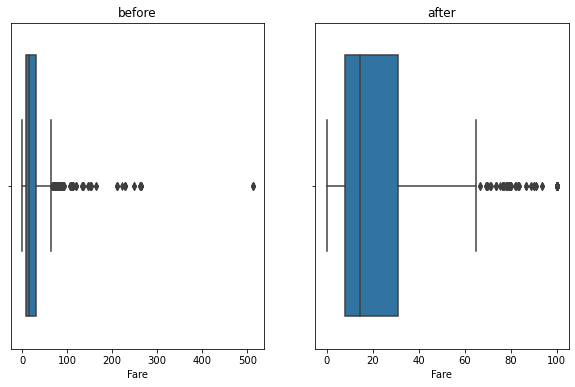

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Fare'])
plt.title('before')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_copy['Fare'])
plt.title('after')

plt.show()

In [27]:
compare = pd.DataFrame()
compare['index'] = df['Fare'].describe().index

compare['before'] = df['Fare'].describe().values
compare['after'] = df_copy['Fare'].describe().values

compare

,index,before,after
0,count,891.000000,891.000000
1,mean,32.204208,27.043158
2,std,49.693429,27.339465
3,min,0.000000,0.000000
4,25%,7.910400,7.910400
5,50%,14.454200,14.454200
6,75%,31.000000,31.000000
7,max,512.329200,100.268800


# check difference

### logistic regression

In [28]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

X_train_copy,X_test_copy,y_train_copy,y_test_copy=train_test_split(df_copy[['Age','Fare']].fillna(0),df_copy['Survived'],test_size=0.3)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score


clf1 = LogisticRegression()
clf2 = LogisticRegression()

In [30]:
clf1.fit(X_train, y_train)
clf2.fit(X_train_copy, y_train_copy)

LogisticRegression()

In [31]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf1.predict_proba(X_test)

y_pred_copy1 = clf2.predict(X_test_copy)
y_pred_copy2 = clf2.predict_proba(X_test_copy)

In [32]:
print('='*50)
print('Before')

print("Accuracy_score: {}".format(accuracy_score(y_test ,y_pred1)))

print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred2[:,1])))

print('='*50)
print('After')

print("Accuracy_score: {}".format(accuracy_score(y_test_copy, y_pred_copy1)))

print("roc_auc_score: {}".format(roc_auc_score(y_test_copy, y_pred_copy2[:,1])))

Before
Accuracy_score: 0.6791044776119403
roc_auc_score: 0.701156734496124
After
Accuracy_score: 0.6343283582089553
roc_auc_score: 0.617671996124031


### random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score


clf1 = RandomForestClassifier()
clf2 = RandomForestClassifier()

In [34]:
clf1.fit(X_train, y_train)
clf2.fit(X_train_copy, y_train_copy)

RandomForestClassifier()

In [35]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf1.predict_proba(X_test)

y_pred_copy1 = clf2.predict(X_test_copy)
y_pred_copy2 = clf2.predict_proba(X_test_copy)

In [36]:
print('='*50)
print('Before')

print("Accuracy_score: {}".format(accuracy_score(y_test ,y_pred1)))

print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred2[:,1])))

print('='*50)
print('After')

print("Accuracy_score: {}".format(accuracy_score(y_test_copy, y_pred_copy1)))

print("roc_auc_score: {}".format(roc_auc_score(y_test_copy, y_pred_copy2[:,1])))

Before
Accuracy_score: 0.7164179104477612
roc_auc_score: 0.7287124515503876
After
Accuracy_score: 0.6567164179104478
roc_auc_score: 0.7002785852713178


Even we are using only 2 features to predict output, in both models we gained a little of more better performance.